In [134]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [135]:
df = pd.read_csv("UsArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [137]:
# Make all numerical figures all float type

df["Assault"] = df["Assault"].astype("float64")
df["UrbanPop"]= df["UrbanPop"].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     float64
 3   UrbanPop  50 non-null     float64
 4   Rape      50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [138]:
# Check the summary of the dataset
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


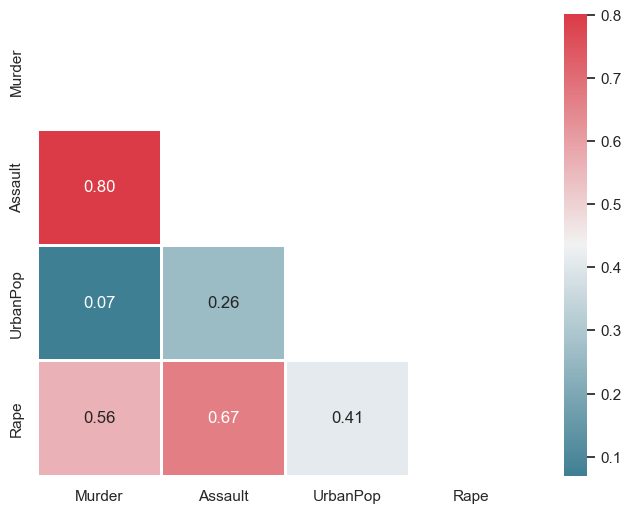

In [139]:
# Create a heatmap to see the correlations

colormap = sns.diverging_palette(220, 10, as_cmap=True)

# get correlations
arrest_corr = df.corr()

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(arrest_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True


plt.figure(figsize=(8,6))
 
# Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
sns.heatmap(arrest_corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

plt.show()


OBSERVATION: UrbanPop does not have strong correlations with any of other features. 

Text(0.5, 1.0, 'Data Distribution by features')

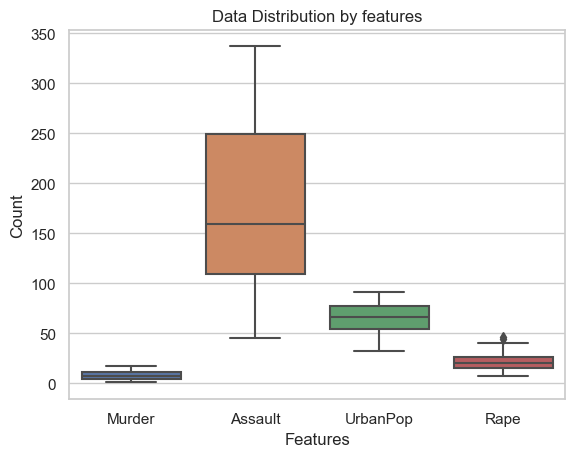

In [140]:
# Create a boxplot for feature distribution

sns.boxplot(data=df)
plt.xlabel("Features")
plt.ylabel("Count")
plt.title("Data Distribution by features")

OBSERVATION: Assault has the largest distribution. 

In [141]:
#Select features and scale the dataset

#Standardisation
from sklearn.preprocessing import StandardScaler

X_stand = StandardScaler()
X_standscale = X_stand.fit_transform(df.iloc[:,1:5])

#Create the dataframe
df_scale = pd.DataFrame(X_standscale, columns = df.columns[1:5])
df_scale.head()


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [142]:
# Show how each component attributes itself to the explained variance
from sklearn.decomposition import PCA
pca = PCA().fit(df_scale)
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Text(0, 0.5, 'cumulative variance')

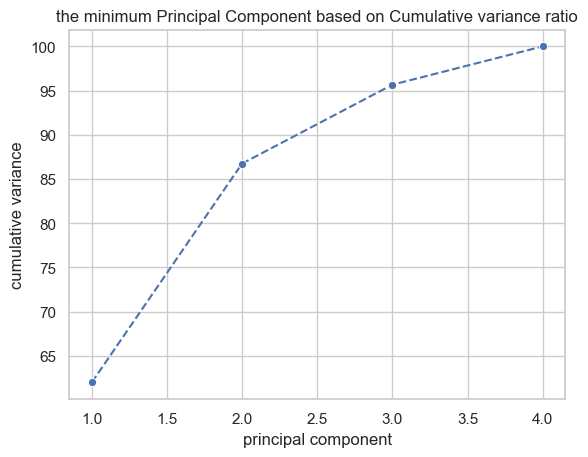

In [143]:
# Create a graph to show the minimum number of components needed

x = np.arange(1,5, step=1)

sns.lineplot(x=x, y=np.cumsum(pca.explained_variance_ratio_)*100, linestyle='--', marker='o')
plt.title("the minimum Principal Component based on Cumulative variance ratio")
plt.xlabel("principal component")
plt.ylabel("cumulative variance")

OBSERVATION : Normally look for 80-99% for components. And the minimum threshold should be 60%. Therefore, 2 is looking good which produces the cumulative variance of over 85%. 

In [144]:
# Proceed PCA with 2 components
pca = PCA(n_components = 2)
pc = pca.fit_transform(df_scale)
pc.shape

(50, 2)

In [145]:
# Transform pc into a dataframe. 
pc_df = pd.DataFrame(data = pc, columns = ['PC 1', 'PC 2'])
pc_df['City'] = df['City']
pc_df.head()

,PC 1,PC 2,City
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


<AxesSubplot:xlabel='Principal Component', ylabel='variance explained'>

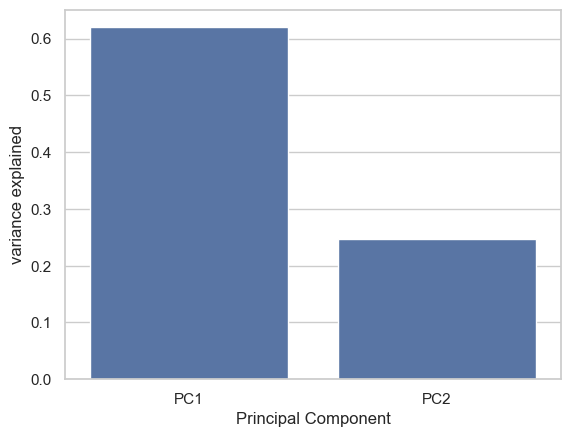

In [146]:
# Create a barplot to visually represent how each component affects the variance

df_1 = pd.DataFrame({'variance explained' : pca.explained_variance_ratio_, 'Principal Component': ['PC1', 'PC2']})
sns.barplot(x='Principal Component', y  = 'variance explained', data = df_1, color = 'b')

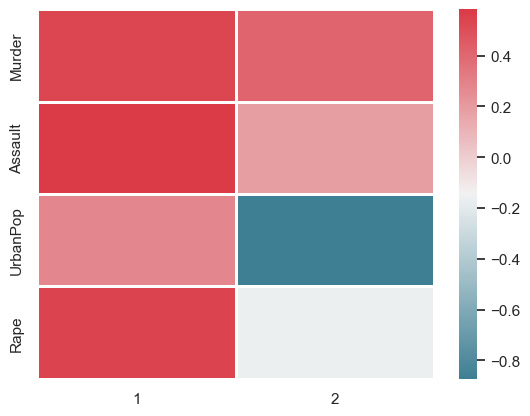

In [147]:
# Check the correlations to each Principal Components

colormap = sns.diverging_palette(220, 10, as_cmap=True)
components = pd.DataFrame(pca.components_, columns=['Murder', 'Assault', 'UrbanPop', 'Rape'], index=range(1, 3)).transpose()
ax = sns.heatmap(components, cmap=colormap, linewidth=1)
plt.show()


OBSERVATION: <br>
The Principal Component 1 has a correlation to all the features, whilst the PC 2 does not have a correlation with UrbanPop the most, followed by Rate. 

C:\Users\101203\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Reduction in variance')

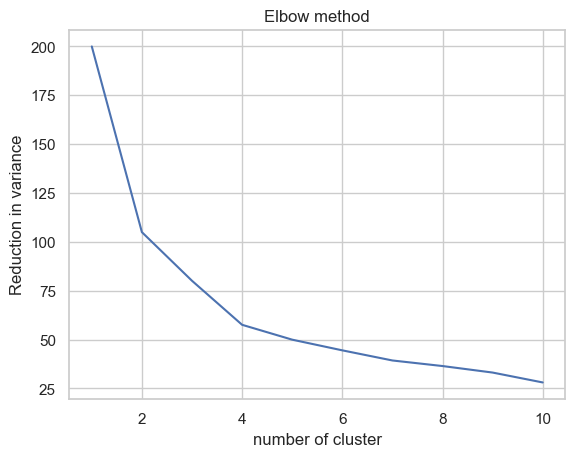

In [148]:
# Kmeans cluster
# Find the best K
from sklearn.cluster import KMeans

inertia = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 101)
    kmeans.fit(df_scale)
    inertia.append(kmeans.inertia_)
    

plt.plot(range(1,11), inertia)
plt.title("Elbow method")
plt.xlabel("number of cluster")
plt.ylabel("Reduction in variance")

OBSERVATION: From the above result, the number of clusters looks good with between 2 and 4. Check further by the silhouette scores.  

In [175]:
# Create a scatterplot along with the silhouette score on each cluster numbers. 

# Convert df_scale to 1D array.
df_scale = df_scale.values.reshape(-1,2)

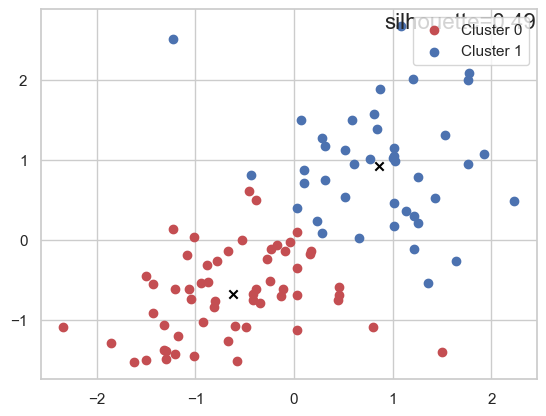

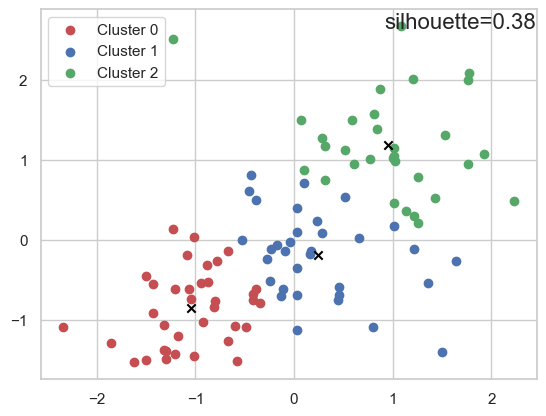

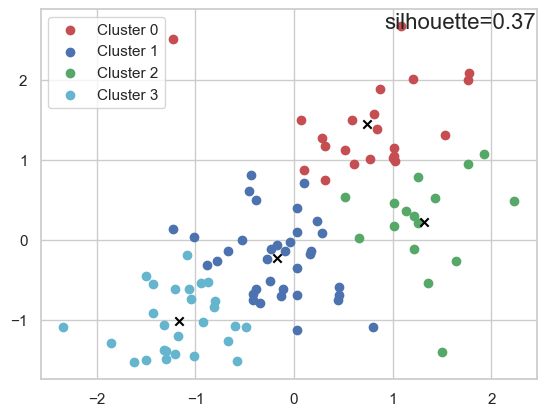

In [176]:
def scatter_Kmeans(x, k):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=101)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    
    for c in range(k):
        plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
#     plt.xlabel('Annual Income')
#     plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(2,5):
    scatter_Kmeans(df_scale, k)

OBSERVATION : 2 clusters give the best result.

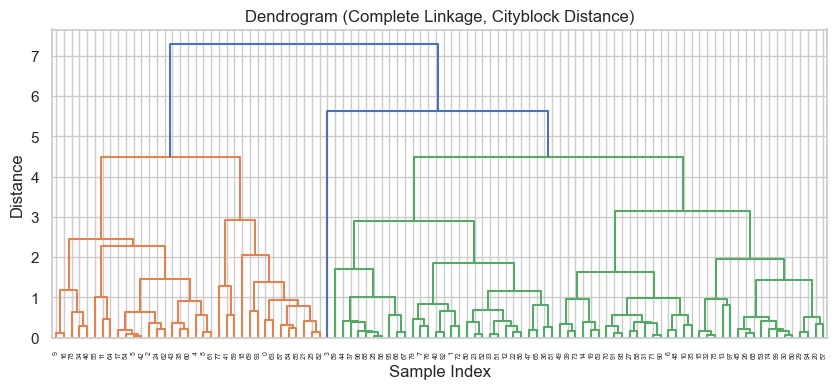

In [177]:
# Create a dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

# calculate the linkage matrix using complete linkage and Cityblock distance
# linkage_matrix = linkage(X_standscale, method='complete', metric='euclidean')
linkage_matrix = linkage(df_scale, method='complete', metric='cityblock')
# plot the dendrogram
plt.figure(figsize=(10, 4))
dendrogram(linkage_matrix)
plt.title('Dendrogram (Complete Linkage, Cityblock Distance)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


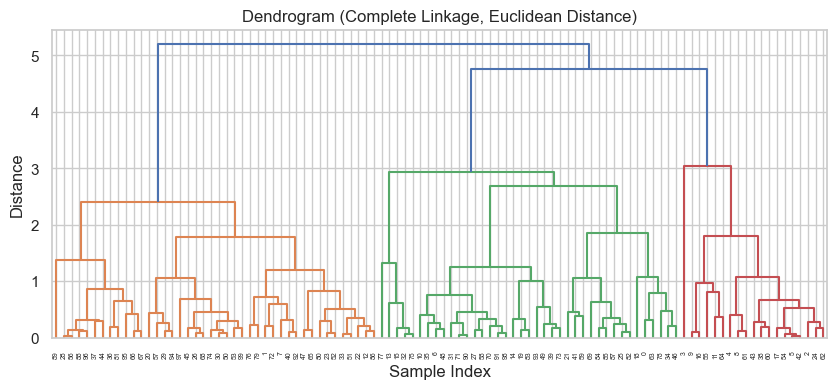

In [178]:
# calculate the linkage matrix using complete linkage and Euclidean distance
linkage_matrix = linkage(df_scale, method='complete', metric='euclidean')
#linkage_matrix = linkage(X_standscale, method='complete', metric='cityblock')
# plot the dendrogram
plt.figure(figsize=(10, 4))
dendrogram(linkage_matrix)
plt.title('Dendrogram (Complete Linkage, Euclidean Distance)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

OBSERVATION: With Dendrogram, I tried to use a different distance which gave a different result. Cityblock distance gave 2 clusters whilst Euclidean distance gave 3 clusters.. I will use the silhuette scores to measure on Agglomerative clustering. 

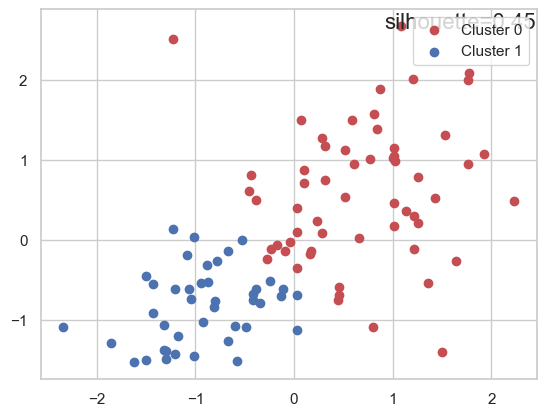

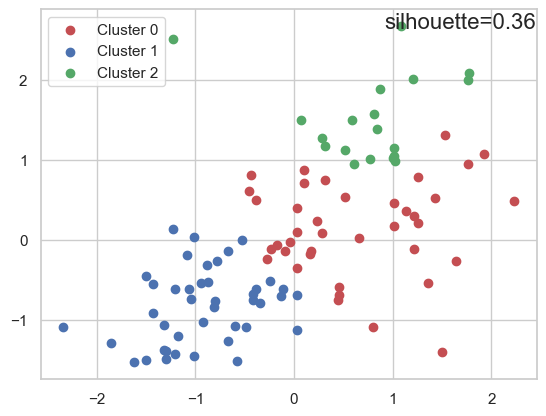

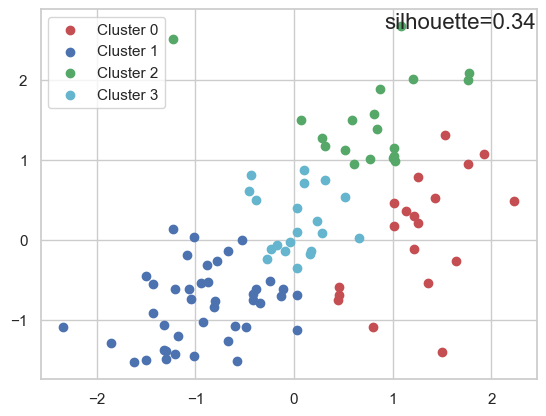

In [179]:
# Create a scatterplot along with the silhouette score on each cluster numbers. 

def scatter_Agglomerative(x, k):
    model = AgglomerativeClustering(n_clusters=k)
    y_pred = model.fit_predict(x)
    colours = 'rbgcmy'
    
    for c in range(k):
        plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
    
    score = round(silhouette_score(x, y_pred, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.legend()
    plt.show()

for k in range(2,5):
    scatter_Agglomerative(df_scale, k)


CONCLUSION: The best clusters are 2. 